**Importing pandas here**

In [1]:
import pandas as pd

**Importing dataset and Having a look at dataset**

In [2]:
train=pd.read_csv("Dataset 2.csv")
test=pd.read_csv("Dataset 1.csv")
stopw=pd.read_csv("Stopword.csv")
test=test[['tweet','target']]
test.head()

,tweet,target
0,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1
1,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0
2,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0
3,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0
4,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0


### Dataset Cleaning process
1. Remove Missing values

In [3]:
nan_value = float("NaN")
train.replace("", nan_value, inplace=True)
train.dropna(subset = ["tweet"], inplace=True)
train.tail()
print(train['target'].value_counts())
nan_value = float("NaN")
test.replace("", nan_value, inplace=True)
test.dropna(subset = ["tweet"], inplace=True)
test.tail()
print(test['target'].value_counts())

1    1108
0    1062
Name: target, dtype: int64
0    1213
1    1187
Name: target, dtype: int64


### Dataset Cleaning process
2. Acquring Stopwords

In [4]:
stopwords=[]
for i in (stopw['Stopwords']):
    stopwords.append(i)

### Dataset Cleaning process
1. Remove Missing values
2. Tokenization
3. Cleaning Extra Characters
4. Removal of Stopwords

In [5]:
tain_corpus=[]
for i in (train['tweet']):
        review=i.split()
        review=[word for word in review]
        review=' '.join(review)
        tain_corpus.append(review)
test_corpus=[]
for i in (test['tweet']):
        review=i.split()
        review=[word for word in review]
        review=' '.join(review)
        test_corpus.append(review)

### Feature Extraction
1. **TFIDF** Term Frequency Inverse Document Frequencey
2. Looking at vocubalary

In [6]:
# from sklearn.feature_extraction.text import CountVectorizer    
# cv=CountVectorizer(max_features=3000)
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 10000
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
X_train=train_vectorizer.fit_transform(tain_corpus).toarray()
y_train=train['target']
train_vectorizer.vocabulary_
test_vectorizer = TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_)
X_test=test_vectorizer.fit_transform(test_corpus).toarray()
y_test=test['target']
train_vectorizer.vocabulary_

{'کہ': 2416,
 'کے': 2454,
 'لے': 1445,
 'لی': 1426,
 'شام': 1159,
 'دلے': 799,
 'کی': 2429,
 'اب': 83,
 'اگر': 255,
 'اس': 118,
 'نے': 1714,
 'کچھ': 2376,
 'جواب': 674,
 'دیا': 837,
 'تو': 570,
 'گانڈ': 2475,
 'مار': 1452,
 'دیں': 872,
 'گے': 2561,
 'ان': 162,
 'چوتیوں': 2081,
 'وہ': 1761,
 'جو': 672,
 'کنسرٹ': 2341,
 'ہو': 2616,
 'رہا': 950,
 'تھا': 588,
 'بھی': 482,
 'کینسل': 2446,
 'کر': 2253,
 'میں': 1640,
 'ہاتھ': 2573,
 'ڈال': 2169,
 'انتڑیاں': 167,
 'نکالے': 1693,
 'گا': 2462,
 'کیا': 2431,
 'تک': 585,
 'سکی': 1121,
 'سب': 1017,
 'سے': 1149,
 'اچھی': 236,
 'ویڈیو': 1778,
 'ہے': 2650,
 'کا': 2215,
 'برا': 337,
 'مزاق': 1524,
 'اتنی': 96,
 'دی': 836,
 'تیری': 608,
 'بھائی': 449,
 'شادی': 1158,
 'والے': 1734,
 'جملے': 664,
 'قابل': 1317,
 'نہیں': 1703,
 'لوڑا': 1380,
 'آگیا': 76,
 'یا': 2663,
 'للی': 1357,
 'ٹوپا': 1805,
 'اپنی': 227,
 'زور': 985,
 'لگائے': 1412,
 'کو': 2348,
 'بند': 389,
 'کروانےمیں': 2288,
 'چوتیا': 2071,
 'دکی': 826,
 'بین': 506,
 'دے': 875,
 'ابرار': 85,
 'یہ':

## Test Train Split
1. 75% Training 25% Testing

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test1,y_train,y_test1 = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

# Decision Tree Evaluation
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [9]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print("----------------Test Train Score Complete Datasets---------------")
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

----------------Test Train Score Complete Datasets---------------
confusion matrix
[[933 280]
 [467 720]]
Accuracy score: 0.68875
Precision score: 0.6932142857142858
F1 score: 0.6862789565940478
Recall score: 0.6878692707685832


## AUC ROC Curve
1. AUC Value
2. Curve

Classifier: ROC AUC=0.688


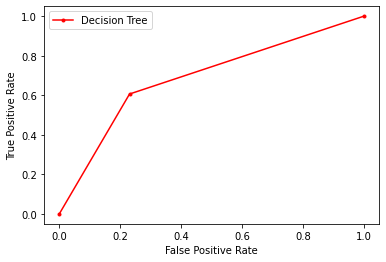

In [10]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


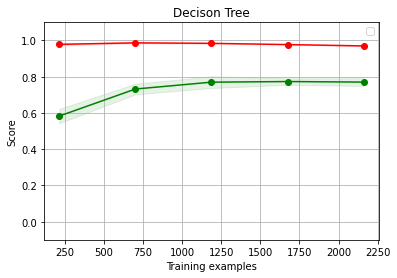

In [11]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = DecisionTreeClassifier()

    # fit
    lg.fit(X_test, y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

## Logistic Regression
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [13]:
cm=confusion_matrix(y_test,pred)
print("Complete Dataset Results")
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

Complete Dataset Results
confusion matrix
[[668 545]
 [328 859]]
Accuracy score: 0.63625
Precision score: 0.6412530463735283
F1 score: 0.6339315026297634
Recall score: 0.6371869337443075


#AUC ROC Curve

Classifier: ROC AUC=0.721


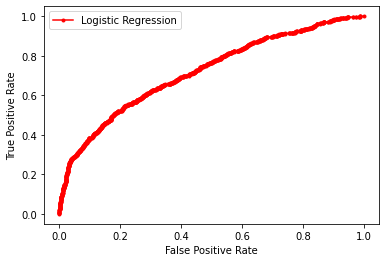

In [14]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


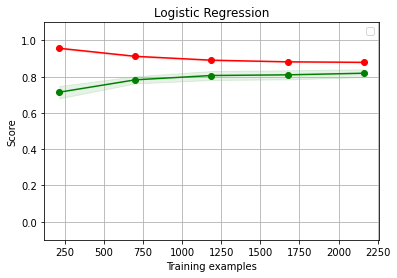

In [15]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = LogisticRegression()

    # fit
    lg.fit(X_test , y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Logistic Regression")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

## SVM

In [16]:
from sklearn.svm import SVC
classifier=SVC(probability=True)
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

## SVM
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [17]:
cm=confusion_matrix(y_test,pred)
print("Complete Dataset Score")
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

Complete Dataset Score
confusion matrix
[[747 466]
 [378 809]]
Accuracy score: 0.6483333333333333
Precision score: 0.6492549019607843
F1 score: 0.6480984879492495
Recall score: 0.6486893253444328


## AUC ROC Curve

Classifier: ROC AUC=0.723


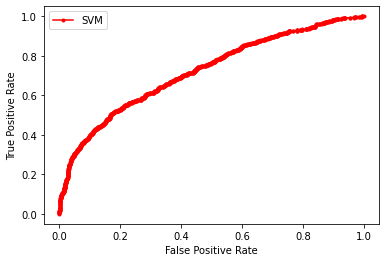

In [18]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


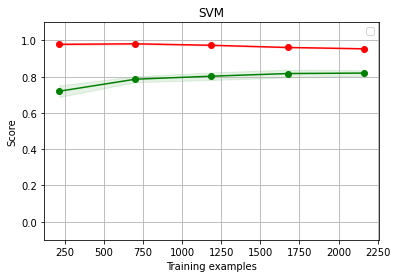

In [19]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
def plot_curve():
    # instantiate
    lg = SVC()

    # fit
    lg.fit(X_test, y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("SVM")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [20]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

## Naive Bayes
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [22]:
cm=confusion_matrix(y_test,pred)
print("Complete Dataset Results")
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

Complete Dataset Results
confusion matrix
[[465 748]
 [232 955]]
Accuracy score: 0.5916666666666667
Precision score: 0.6139600047515104
F1 score: 0.5739053243718183
Recall score: 0.5939481786404099


## AUC ROC Curve

Classifier: ROC AUC=0.595


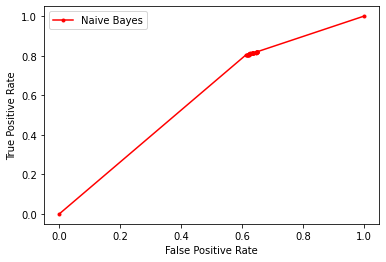

In [23]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


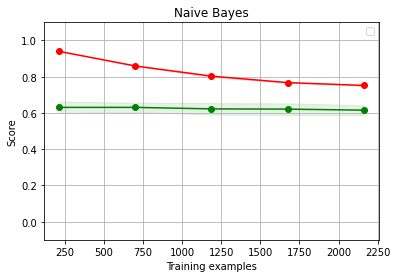

In [24]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = GaussianNB()

    # fit
    lg.fit(X_test, y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Naive Bayes")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

## Random Forest
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [26]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print("Complete Dataset Results")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

confusion matrix
Complete Dataset Results
[[854 359]
 [433 754]]
Accuracy score: 0.67
Precision score: 0.67050350069218
F1 score: 0.6694260869565217
Recall score: 0.6696271993032515


## AUC ROC Curve

Classifier: ROC AUC=0.733


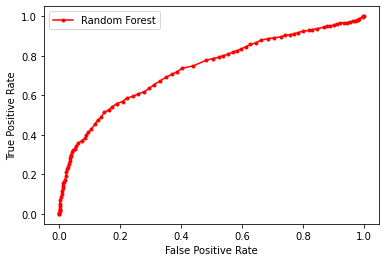

In [27]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


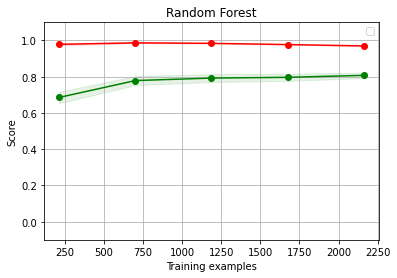

In [28]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = RandomForestClassifier()

    # fit
    lg.fit(X_test, y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Random Forest")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()